In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_crete_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('crete')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/crete_{date}.csv',index=False)
get_listings_crete_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_crete = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_crete)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(crete_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 20178 AirBnb listings.


In [4]:
crete_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2020-12.csv')
crete_raw_df_12_12_2020.shape


(18091, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for crete
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_crete = glob.glob('crete/**.csv')
files_crete

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['crete/Crete_2021-09.csv',
 'crete/Crete_2021-08.csv',
 'crete/Crete_2020-11.csv',
 'crete/Crete_2020-12.csv',
 'crete/Crete_2021-01.csv',
 'crete/Crete_2021-03.csv',
 'crete/Crete_2021-02.csv',
 'crete/Crete_2021-07.csv',
 'crete/Crete_2021-10.csv',
 'crete/Crete_2021-04.csv']

In [9]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

crete_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(crete_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(crete_raw_df_12_12_2020['price'].mean(),2)}.")

crete_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(crete_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_1_9_2021['price'].mean(),2)}.")

crete_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(crete_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_2_8_2021['price'].mean(),2)}.")

crete_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(crete_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_3_4_2021['price'].mean(),2)}.")

crete_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(crete_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_4_9_2021['price'].mean(),2)}.")

#crete_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(crete_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_5_19_2021['price'].mean(),2)}.")

#crete_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-06.csv')
#print(f"The 6_3_2021 dataset contains {len(crete_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_6_3_2021['price'].mean(),2)}.")

crete_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(crete_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_7_4_2021['price'].mean(),2)}.")

crete_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(crete_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_8_6_2021['price'].mean(),2)}.")

crete_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(crete_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_9_7_2021['price'].mean(),2)}.")

crete_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(crete_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_10_6_2021['price'].mean(),2)}.")

#crete_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(crete_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 18091 AirBnb listings; the avg price is €268.73.
The 1_9_2021 dataset contains 18316 AirBnb listings; the avg price is €279.93.
The 2_8_2021 dataset contains 18521 AirBnb listings; the avg price is €279.71.
The 3_4_2021 dataset contains 18915 AirBnb listings; the avg price is €280.21.
The 4_9_2021 dataset contains 19431 AirBnb listings; the avg price is €173.43.
The 7_4_2021 dataset contains 19673 AirBnb listings; the avg price is €208.33.
The 8_6_2021 dataset contains 20056 AirBnb listings; the avg price is €195.98.
The 9_7_2021 dataset contains 20301 AirBnb listings; the avg price is €165.7.
The 10_6_2021 dataset contains 20180 AirBnb listings; the avg price is €225.38.


In [11]:
df_list_crete = [crete_raw_df_12_12_2020, crete_raw_df_1_9_2021, crete_raw_df_2_8_2021,
           crete_raw_df_3_4_2021, crete_raw_df_4_9_2021,crete_raw_df_7_4_2021,
           crete_raw_df_8_6_2021, crete_raw_df_9_7_2021, crete_raw_df_10_6_2021]

dates_crete = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_crete = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_crete = []

def airbnb_parse_crete(df_list, files):
    for file in files_crete:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/crete/crete_{file}.csv")
        print(f"The {file} crete dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_crete(df_list, dates):
    for file in files_crete:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/crete/crete_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_crete.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_crete)

crete_parse = airbnb_parse_crete(df_list_crete, files_crete)


The 2020-12 crete dataset contains 18091 AirBnb listings -- the avg price is €268.73.
The 2021-01 crete dataset contains 18316 AirBnb listings -- the avg price is €279.93.
The 2021-02 crete dataset contains 18521 AirBnb listings -- the avg price is €279.71.
The 2021-03 crete dataset contains 18915 AirBnb listings -- the avg price is €280.21.
The 2021-04 crete dataset contains 19431 AirBnb listings -- the avg price is €173.43.
The 2021-07 crete dataset contains 19673 AirBnb listings -- the avg price is €208.33.
The 2021-08 crete dataset contains 20056 AirBnb listings -- the avg price is €195.98.
The 2021-09 crete dataset contains 20301 AirBnb listings -- the avg price is €165.7.
The 2021-10 crete dataset contains 20180 AirBnb listings -- the avg price is €225.38.


In [12]:
crete_summary = airbnb_to_frame_crete(df_list_crete, files_crete)
crete_summary['Date of scrape'] = pd.to_datetime(crete_summary['Date of scrape'])
crete_summary['City'] = 'Crete'

dfi.export(crete_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/airbnb_crete_summary.png")


In [13]:
master_df_crete = pd.concat(df_list_crete)
master_df_crete_unique = master_df_crete.drop_duplicates(subset='id')
master_df_crete_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27966,Heraklion-Pinelopi Apartment,120502,Antonia & Manolis,NaN,Μαλεβιζίου,35.33198,25.08182,Entire home/apt,45,2,120,2020-11-15,4.41,3,0,NaN,NaN
1,28970,artists' house in the old town,124670,Eirini,NaN,Ηρακλείου,35.34005,25.12809,Entire home/apt,70,1,52,2017-10-16,0.41,2,89,NaN,NaN
2,29856,Matala Dimitris Villa and Hotel,128653,Dimitris,NaN,Φαιστού,34.99311,24.74964,Private room,50,1,40,2019-10-13,0.32,2,220,NaN,NaN
3,31023,Guesthouse Chryssoula Room No1,133208,Chryssoula,NaN,Χανίων,35.51591,24.01751,Entire home/apt,35,2,266,2020-09-01,2.58,4,270,NaN,NaN
4,31789,Kissamos Windmills,136649,Georgios,NaN,Κισσάμου,35.49762,23.69768,Entire home/apt,200,3,2,2012-09-23,0.02,1,365,NaN,NaN


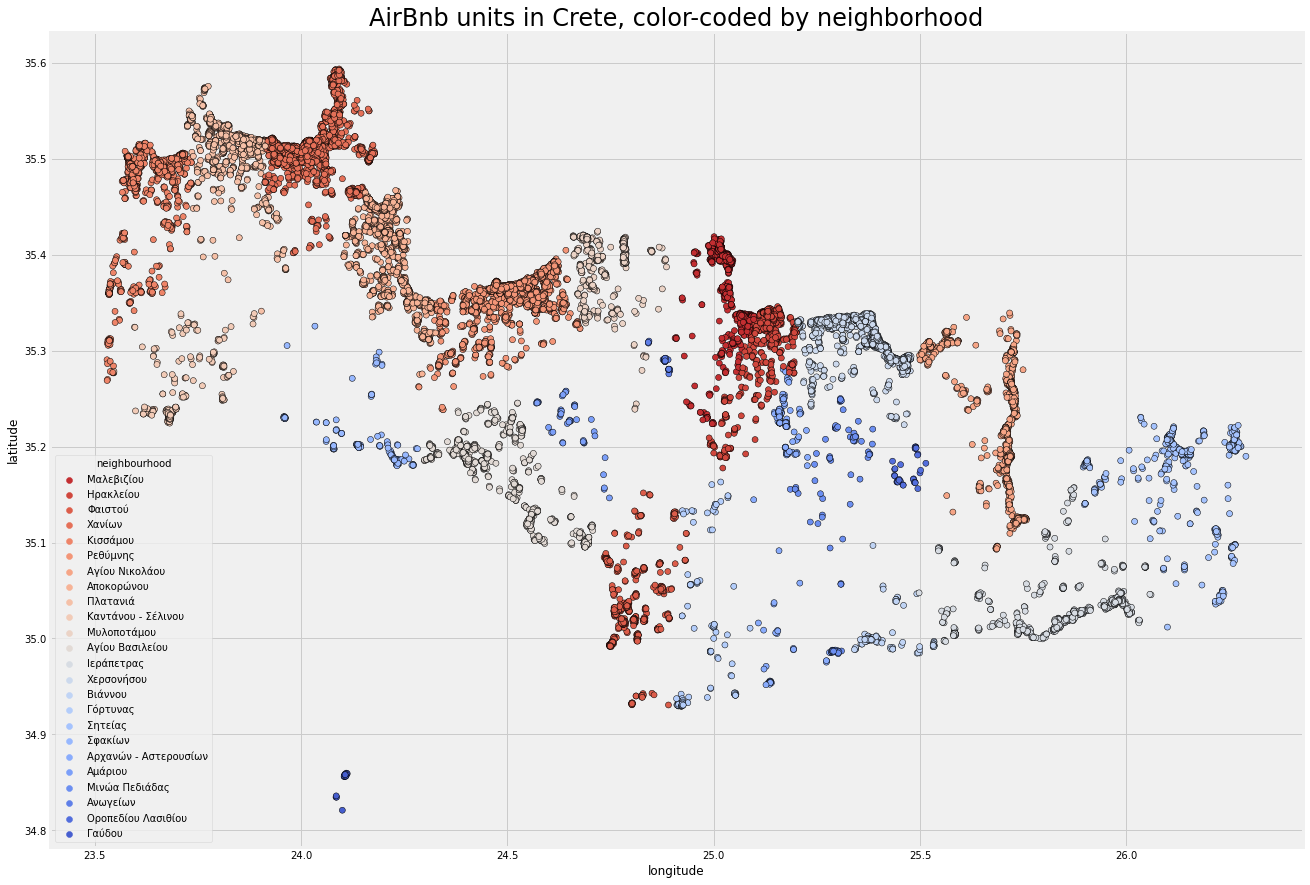

In [14]:
title = 'AirBnb units in Crete, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_crete_unique.longitude, master_df_crete_unique.latitude, hue = master_df_crete_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/airbnb_crete_map.png')
plt.show()

## Add review data through a join

In [15]:
df_reviews = pd.concat([crete_raw_df_10_6_2021,raw_df_crete],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

4.0    4701
2.0    3694
3.0    2892
6.0    2829
5.0    2202
1.0      85
Name: accommodates, dtype: int64

## Regression

In [16]:
#df_reviews_.columns

In [17]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [18]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  391.6852664433023
Coefficients:  [-14.65688752  49.38457873  15.15183599  -1.47201617  -6.09032671
 -39.87161571  50.10099876 -18.3881051  -25.29250806]
LinearRegression()


In [19]:
y_pred2 = regr.predict(X_)

In [20]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


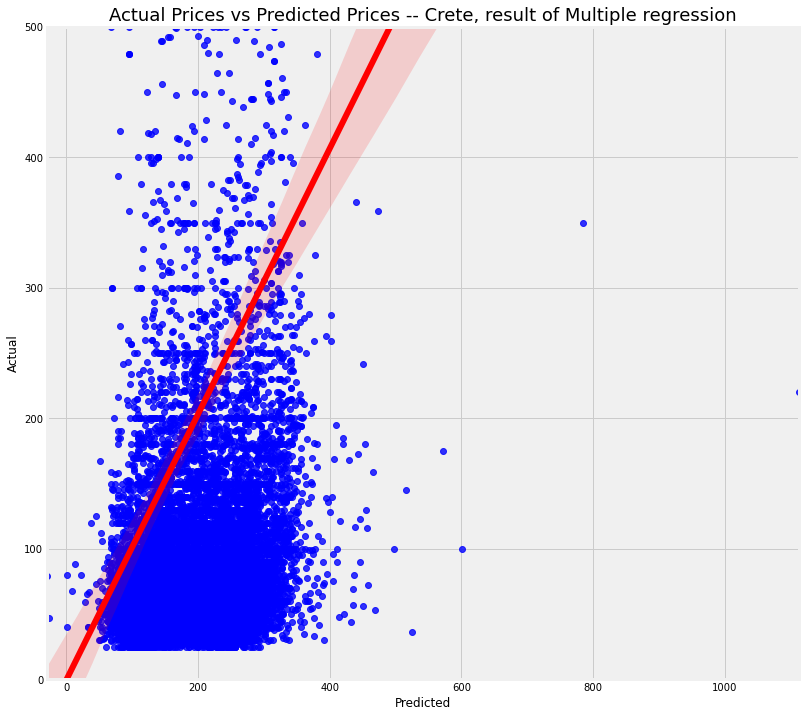

In [21]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Crete, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/airbnb_crete_multiple_regression.png')



In [22]:
df_result.shape

(14494, 3)

## The most mispriced [undervalued]

In [23]:
crete_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
crete_mispriced['%'] = (crete_mispriced['Actual']/ crete_mispriced['Predicted'] -1) *100
crete_mispriced_perc = crete_mispriced.sort_values(by=['%'], ascending=True)
crete_mispriced_perc_plot = crete_mispriced_perc.loc[(crete_mispriced_perc['Predicted']>=1) & (crete_mispriced_perc['Diff']>= 1)]
crete_mispriced_perc_plot = crete_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
crete_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
4357,36,524.343959,488.343959,-93.134278
13251,30,391.867873,361.867873,-92.344358
2086,25,293.944212,268.944212,-91.494985
17918,25,291.894628,266.894628,-91.435265
16251,33,375.728689,342.728689,-91.217067


In [21]:

crete_mispriced_1 = raw_df_crete.loc[raw_df_crete.id==827]
crete_mispriced_2 = raw_df_crete.loc[raw_df_crete.id==748]
crete_mispriced_3 = raw_df_crete.loc[raw_df_crete.index==1308]
crete_mispriced_4 = raw_df_crete.loc[raw_df_crete.index==1748]
crete_mispriced_5 = raw_df_crete.loc[raw_df_crete.index==894]

In [24]:
id_array = [4537, 13251, 2086, 17918, 16251]

crete_mispriced_query = raw_df_crete.query('index in @id_array')
crete_mispriced_query = crete_mispriced_query.rename({'index': 'id'}, axis=1)
crete_mispriced_query.shape
#crete_mispriced_query.head(1)

(5, 74)

In [21]:
#crete_mispriced_neg = raw_df_crete.loc[raw_df_crete.index==4119]
crete_mispriced_perc_1 = raw_df_crete.loc[raw_df_crete.id==7125]
crete_mispriced_perc_2 = raw_df_crete.loc[raw_df_crete.id==3679]
crete_mispriced_perc_3 = raw_df_crete.loc[raw_df_crete.id==8267]
crete_mispriced_perc_4 = raw_df_crete.loc[raw_df_crete.id==2483]
crete_mispriced_perc_5 = raw_df_crete.loc[raw_df_crete.id==3449]

In [29]:
crete_mispriced = crete_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
crete_mispriced_1 = crete_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

crete_mispriced_1[:1]
crete_mispriced_1[:2]
crete_mispriced_1[:3]
crete_mispriced_1[:4]
crete_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
2086,8982836,$25.00,3.00,4.0,4.0,2.0,5.00,3.00,"Chersonisos, Crete, Greece",https://www.airbnb.com/rooms/8982836
4537,16989334,$74.00,4.83,5.0,5.0,5.0,5.00,4.67,"Agia Pelagia, Greece",https://www.airbnb.com/rooms/16989334
13251,38686258,$30.00,5.00,3.0,5.0,5.0,4.00,5.00,"Sitia, Crete, Greece",https://www.airbnb.com/rooms/38686258
16251,46293031,$33.00,2.00,1.0,3.0,5.0,4.00,3.00,"Malia, Greece",https://www.airbnb.com/rooms/46293031
17918,49819712,$25.00,5.00,5.0,5.0,5.0,4.33,5.00,"Heraklion, Greece",https://www.airbnb.com/rooms/49819712


In [26]:
dfi.export(crete_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/airbnb_crete_mispriced.png")



## The best score

In [30]:
crete_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
crete_high_value.head(6)

,Actual,Predicted,Diff
20048,220,1111.937683,891.937683
19864,350,785.121266,435.121266
4408,100,600.706485,500.706485
12882,175,572.382066,397.382066
4357,36,524.343959,488.343959
8161,145,515.406762,370.406762


In [31]:
id_array = [20048, 19864, 4408, 12882, 4357]

crete_best_score_query = raw_df_crete.query('index in @id_array')
crete_best_score_query = crete_best_score_query.rename({'index': 'id'}, axis=1)
#crete_best_score_query.head(1)

In [32]:
crete_best_score = crete_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
crete_best_score_1 = crete_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

crete_best_score_1[:1]
crete_best_score_1[:2]
crete_best_score_1[:3]
crete_best_score_1[:4]
crete_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
4357,16425401,$36.00,4.71,4.86,4.57,5.0,4.86,4.86,NaN,https://www.airbnb.com/rooms/16425401
4408,16674808,$100.00,4.00,3.00,4.00,4.0,4.00,5.00,NaN,https://www.airbnb.com/rooms/16674808
12882,37258894,$175.00,2.00,3.00,5.00,1.0,1.00,1.00,NaN,https://www.airbnb.com/rooms/37258894
19864,51857521,$80.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/51857521
20048,52385585,$100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/52385585


In [33]:
dfi.export(crete_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/airbnb_crete_best_score.png")


